In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm as tqdm
import time
import progressbar

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set(rc={'figure.figsize': (11.7, 8.27)})
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('images.csv')
data_np = data.values
img_matrix = data_np[13, 1:].reshape(28, 28)

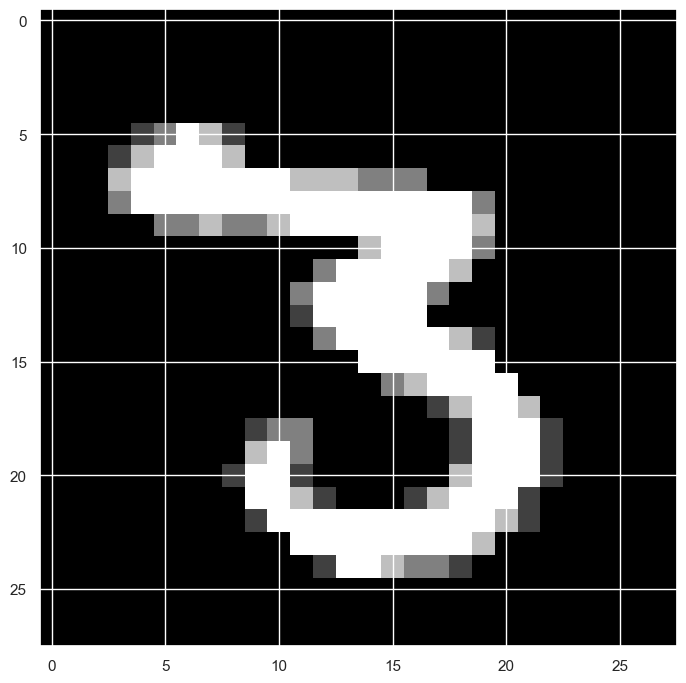

In [3]:
plt.imshow(img_matrix, cmap='gray', vmin=0, vmax=255)

In [4]:
x = data.drop(columns='label')
y = data['label']

In [5]:
# function to display digits
def show_image(img_flt, ax=None):
    img = img_flt.reshape(28, 28)
    if ax is None:
        plt.imshow(img)
    else:
        ax.axis('off')
        ax.imshow(img)

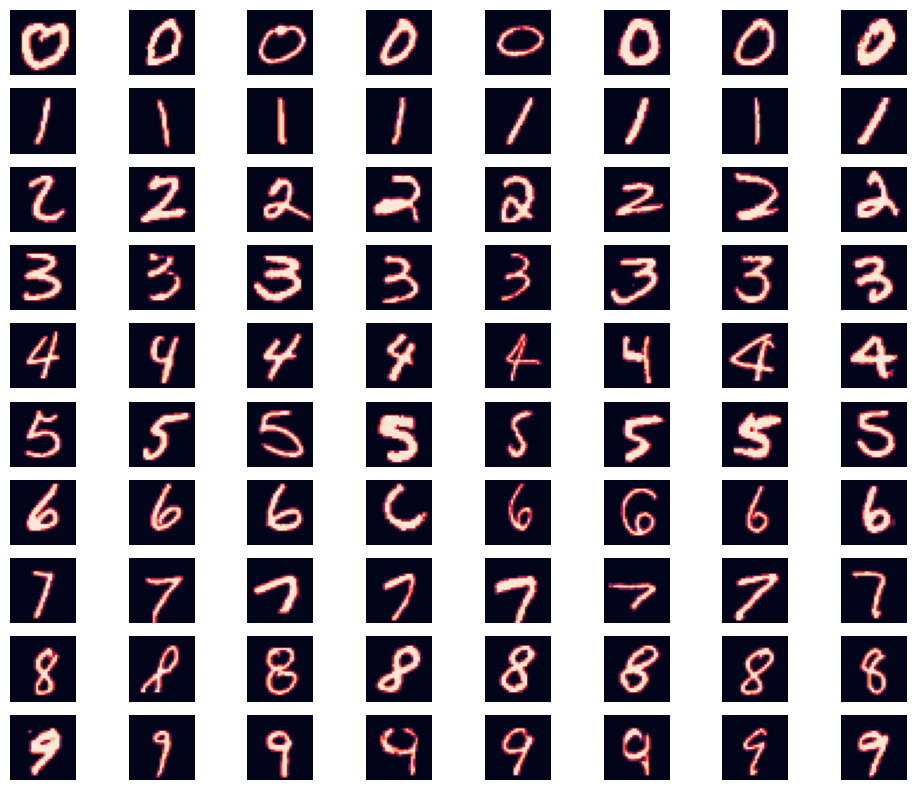

In [6]:
# look at images
fig, axs = plt.subplots(10, 8, figsize=(12,10))

group_number = 0
for string, group in data.groupby('label', as_index=False):
    random_numbers = group.sample(8).drop(columns='label')
    image_vects = [x.values for string, x in random_numbers.iterrows()]
    
    image_number = 0
    for image in image_vects:
        show_image(image, ax=axs[group_number][image_number])
        image_number += 1
        
    group_number += 1

<Axes: >

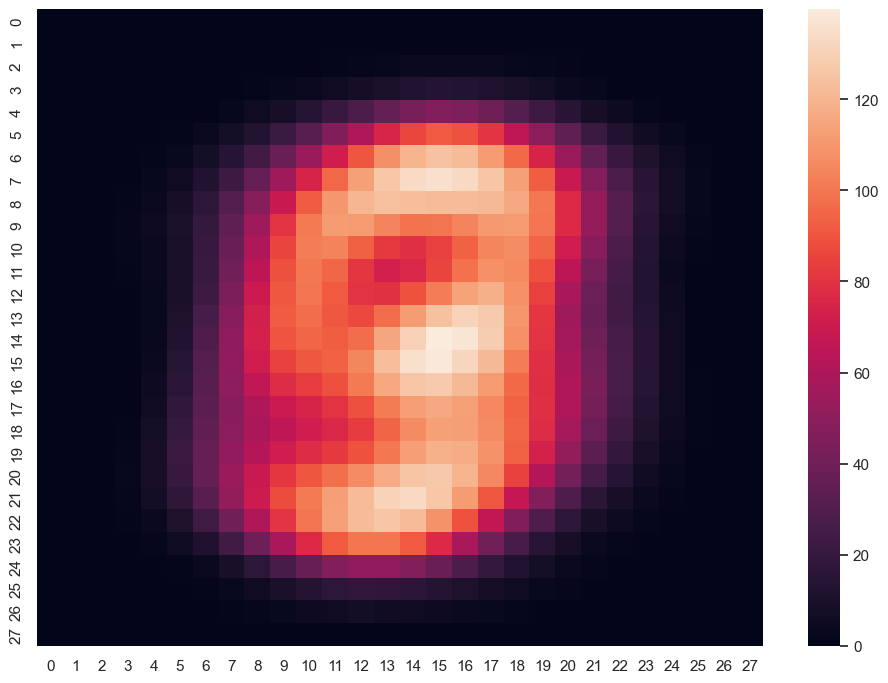

In [7]:
# let's build a heat map of what average value different pixels take
sns.heatmap(pd.DataFrame(x.mean().values.reshape(28, 28)))

<Axes: >

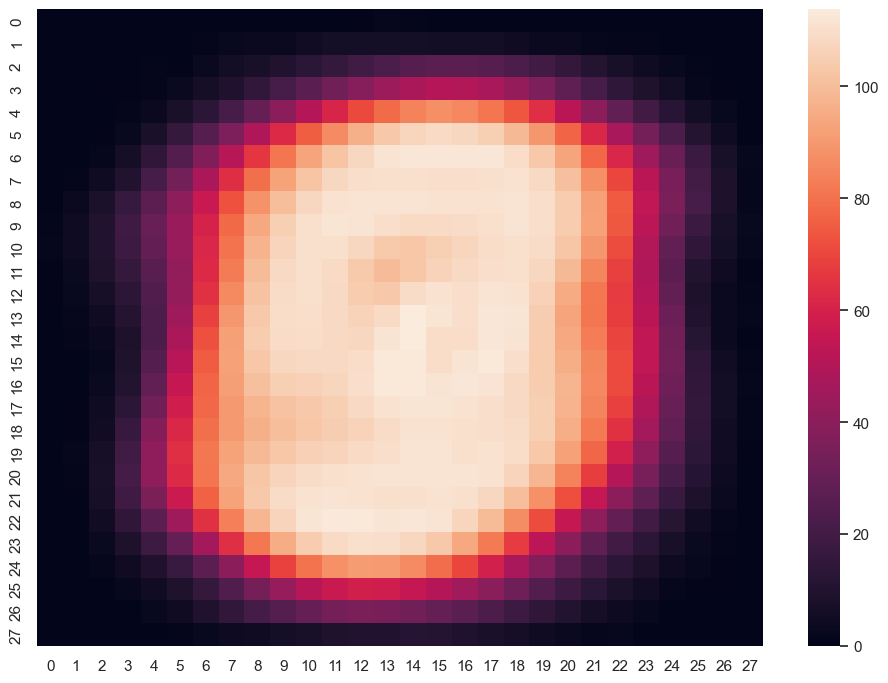

In [8]:
# let's build a heat map of the spread of values for different pixels
sns.heatmap(pd.DataFrame(x.std().values.reshape(28, 28)))

In [9]:
# split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [10]:
# define model Dicision Tree
model_tree = DecisionTreeClassifier(min_samples_leaf=5, criterion='gini')

In [11]:
%%time
# train our first model
model_tree.fit(x_train, y_train)

CPU times: total: 7.45 s
Wall time: 17.1 s


DecisionTreeClassifier(min_samples_leaf=5)

In [12]:
print(f'train: {model_tree.score(x_train, y_train)}\ntest: {model_tree.score(x_test, y_test)}')

train: 0.9390773809523809
test: 0.8660714285714286


In [13]:
# define model Random Forest
model_rndforest = RandomForestClassifier(n_estimators=100, min_samples_leaf=4, criterion='gini')

In [14]:
%%time
#train our second model
(model_rndforest.fit(x_train, y_train))

CPU times: total: 17.3 s
Wall time: 49.6 s


RandomForestClassifier(min_samples_leaf=4)

In [15]:
print(f'train: {model_rndforest.score(x_train, y_train)}\ntest: {model_rndforest.score(x_test, y_test)}')

train: 0.993452380952381
test: 0.9577380952380953


In [16]:
y_pred = model_rndforest.predict(x_test)

In [17]:
# let's see if the model is classified incorrectly
x_err = x_test[y_pred != y_test]
y_err = y_test[y_pred != y_test]
error = x_err.copy(deep=True)
error['y'] = y_err
error['y_pred'] = y_pred[y_pred != y_test]

In [18]:
df = error.groupby(['y', 'y_pred'], as_index=False).agg({'pixel0':'count'})
df.head()

,y,y_pred,pixel0
0,0,2,1
1,0,3,1
2,0,5,2
3,0,6,8
4,0,8,5


digit 0: 6 times
digit 1: 8 times
digit 2: 8 times
digit 3: 8 times
digit 4: 6 times
digit 5: 8 times
digit 6: 5 times
digit 7: 6 times
digit 8: 9 times
digit 9: 8 times


<Axes: >

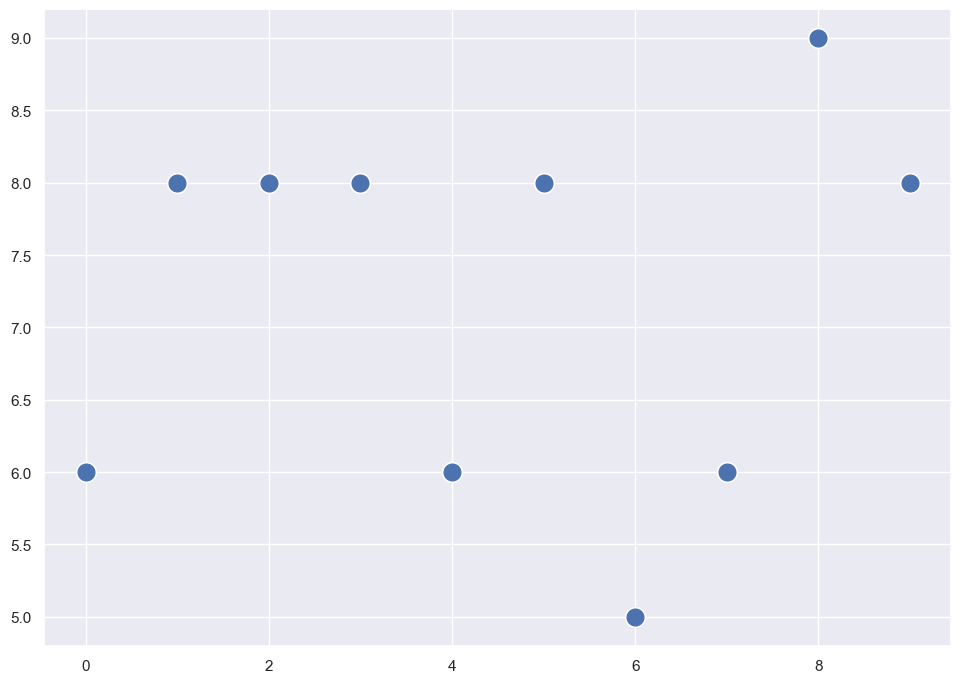

In [19]:
# let's look at which numbers the model classifies incorrectly
a = []
for q in range(10):
    print(f'digit {q}: {list(df["y"]).count(q)} times')
    a.append(list(df["y"]).count(q))
sns.scatterplot(a, marker='o', s=200)